# 3.1 Program Structure And Execution
- Python programs are structured as a sequence of statements
- When loading source files, the interpreter executes statements in the order they appear untill there are no more statements to execute.
- This execution model applies to both files which run as main program or library files which are loaded via import

# 3.2 Conditional Execution
- if ,elif,else are used for conditional execution
- Both elif, else are optional

# 3.3 Loops Interation

In [27]:
print('######### For & while loop ###############')
for _ in range(0,3):
    print(_)
i = 3
while i>0:
    print(i)
    i -= 1     
print('##################### Break & Continue ###################')
i = 3
while i>0:
    if i==1:
        break
    print(i)
    i -= 1
i = 3    
while i>0:
    i -= 1 
    if i==1:
        continue
    print(i)
        

######### For & while loop ###############
0
1
2
3
2
1
##################### Break & Continue ###################
3
2
2
0


# 3.4 Exceptions

In [28]:
try:
    a = 1 / 0
except ValueError as e1:  # Multiple type of exceptions can be defined
    print("It is value error")
except NameError as e2:  # Multiple type of exceptions can be defined
    print("It is name error")
except Exception as e:
    print(
        f"Args - ", e.args
    )  # The tuple of argument supplied when raising the exception.Generally it is error message
    print(
        e.__cause__
    )  # Previous exception if the exception was intentionally raised in response to handling another exception
    print(
        e.__context__
    )  # Previous exception if the exception was raised while handling another exception
    print(e.__traceback__)  # Stack traceback object associated with exception
    print(e.args)
    print("Will be executed if none of the exceptions are matching")
else:
    print("Will be executed if there is no failure in try block")
finally:
    print("Will be executed if there is a failure or not in try block")

Args -  ('division by zero',)
None
None
('division by zero',)
Will be executed if none of the exceptions are matching
Will be executed if there is a failure or not in try block


# 3.4.1 The Exception Hierarchy
- There are vast number of exception are available that might potentially occur
- Exceptions are organized into hierarchy via inheritance, instead targetting specific error it might be easier to focus on more generally 
- For e.g. Instead of KeyError or IndexError Raise LookupError in this you dont need to know all exceptions  

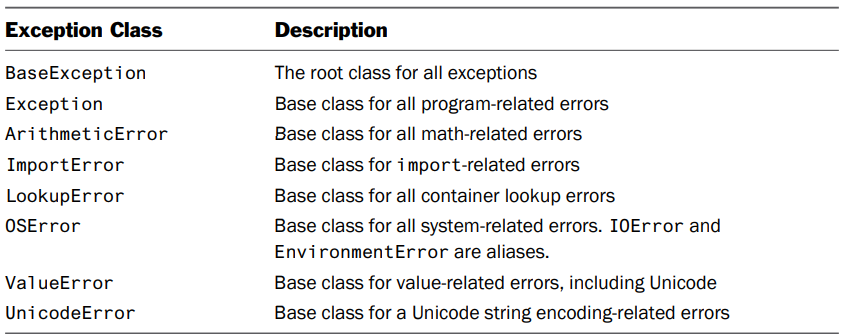  
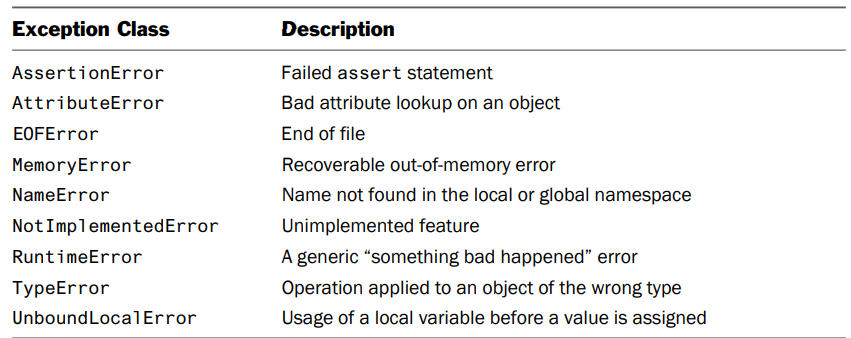

# 3.4.2 Exceptions and Control Flow
- Normally exceptions are reserved for the handling of errors
- Few exceptions are used to alter the control flow  

__SystemExit :__
It is used to make a program terminate on purpose.As an argument you can provide a integer code or string message.If it is string  it is printed to sys.stderr and the program is terminated with a exit code if 1

__KeyboardInterrupt :__ 
It is raised when the program receives a SIGINT signal (typically by pressing Control-C in a terminal). This exception is a bit unusual in that it is asynchronous—meaning that it could occur at almost any time and on any statement in your program.

__StopIteration :__
The StopIteration exception is part of the iteration protocol and signals the end of iteration

# 3.4.3 Defining New Exceptions

In [29]:
class CustomException(Exception):
    def __init__(self, errno, msg):
        self.args = (errno, msg)  # Mandatory to initialize this
        self.errno = errno
        self.errmsg = msg
        super().__init__(f"Custom message {self.errmsg}")


raise CustomException(40, "I am Error")

CustomException: Custom message I am Error

# 3.4.4 Chained Exception
- `__cause__`  attribute is reserved for when you are expecting the possibility of a failure
- `__context__`  attribute is set in both cases but would be the only source of information for an unexpected exception raised while handling another exception

In [ ]:
######################################__context__###############################################
def chained_exception():
    try:
        a = int("a")
    except Exception as e:
        print(
            f"Exception Type : {type(eRR)}"
        )  # Trying to produce error while handling an existing exception to polulate __context__ var


try:
    chained_exception()
except Exception as Err:
    print(f"Exception Type : {type(Err)}")
    print(f"Exception {Err} occured while handling below exception")
    print(Err.__context__)
    print(Err.__cause__)  # As expected None


######################################__cause__###############################################
def chained_exception():
    try:
        a = int("a")
    except Exception as e:
        raise ValueError(
            "Invalid Value"
        ) from e  # Trying to raise another exception while handling an existing exception to polulate __cause__ var


try:
    chained_exception()
except Exception as Err:
    print(f"Exception Type : {type(Err)}")
    print(f"Exception {Err} was raised while handling below exception")
    print(Err.__cause__)
    print(Err.__context__)

Exception Type : <class 'NameError'>
Exception name 'eRR' is not defined occured while handling below exception
invalid literal for int() with base 10: 'a'
None
Exception Type : <class 'ValueError'>
Exception Invalid Value was raised while handling below exception
invalid literal for int() with base 10: 'a'
invalid literal for int() with base 10: 'a'


# 3.4.5 Exception Tracebacks

In [ ]:
def tracebook():
    a = int("a")


import traceback

try:
    tracebook()
except Exception as e:
    tbllines = traceback.format_exception(type(e), e, e.__traceback__)
    tbmsg = "".join(tbllines)
    print(tbmsg)

Traceback (most recent call last):
  File "C:\Users\yadav\AppData\Local\Temp\ipykernel_16080\1999254238.py", line 5, in <module>
    tracebook()
  File "C:\Users\yadav\AppData\Local\Temp\ipykernel_16080\1999254238.py", line 2, in tracebook
    a = int('a')
        ^^^^^^^^
ValueError: invalid literal for int() with base 10: 'a'



# 3.4.6 Exception Handling Advice
- Not catch exceptions that can't be handled.
- Try to make your except clauses as narrow as reasonbale

# 3.5 Context Managers and the with Statement
- When control flow enters context it executes `obj.__enter__()` to signal that a new context is being entered.
- When control flow leaves context it executes `obj.__exit__(type,value,tracebook)`.
- If no exception has been raised the three args to `__exit__()` are all set to None.
- Otherwise they contain the type,value ,tracebook associated with exception.

In [ ]:
# Custom Context Manager
class Manager:
    def __init__(self,x):
        self.x = x
    def __enter__(self):
        print('Entering.....................')
        return self    
    def __exit__(self,ty,val,tb):
        print('Exiting......................')
        return self  
with Manager([1,2,3]) as M:
    print(M.x)
    M.x.append(1)
print(M.x)



Entering.....................
[1, 2, 3]
Exiting......................
[1, 2, 3, 1]


# 3.6 Assertion and `__debug__`
- Assert statement can introduce debugging code into program. `assert Test Condition [,msg]`
- Assert statement should not be used to make program correct like checking used input because it wont be executed if program run in optimizided mode using -O option to the iterpreter.
- A common use of assert is in testing

In [ ]:
def string_upper(str):
    return str.upper()

assert string_upper('Ab') == 'AB' , 'Test case failed'
assert string_upper('Ab') == 'Ac' , 'Test case failed'

AssertionError: Test case failed